<a href="https://colab.research.google.com/github/slidemorning/Kaggle/blob/master/Titanic_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [0]:
TRAIN_DATA_PATH = './drive/My Drive/Colab Notebooks/DataSets/Titanic/train.csv'
TEST_DATA_PATH = './drive/My Drive/Colab Notebooks/DataSets/Titanic/test.csv'

df_train = pd.read_csv(TRAIN_DATA_PATH)
df_test = pd.read_csv(TEST_DATA_PATH)

In [172]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [173]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Check Null Data

In [174]:
for col in df_train.columns:
  msg = 'columns: {:>10}\t percent of NaN value: {:.2f}'.format(col, df_train[col].isnull().sum() / df_train[col].shape[0])
  print(msg)  

columns: PassengerId	 percent of NaN value: 0.00
columns:   Survived	 percent of NaN value: 0.00
columns:     Pclass	 percent of NaN value: 0.00
columns:       Name	 percent of NaN value: 0.00
columns:        Sex	 percent of NaN value: 0.00
columns:        Age	 percent of NaN value: 0.20
columns:      SibSp	 percent of NaN value: 0.00
columns:      Parch	 percent of NaN value: 0.00
columns:     Ticket	 percent of NaN value: 0.00
columns:       Fare	 percent of NaN value: 0.00
columns:      Cabin	 percent of NaN value: 0.77
columns:   Embarked	 percent of NaN value: 0.00


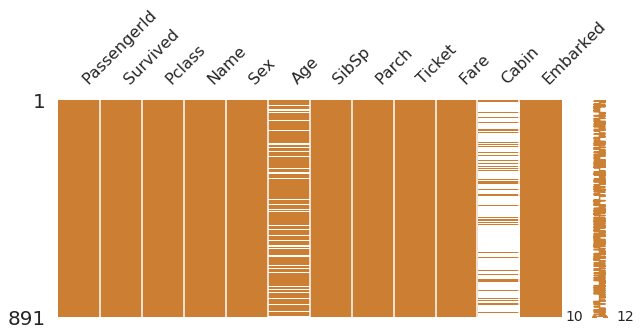

In [175]:
msno.matrix(df=df_train.iloc[:, :], figsize=(10, 4), color=(0.8, 0.5, 0.2))

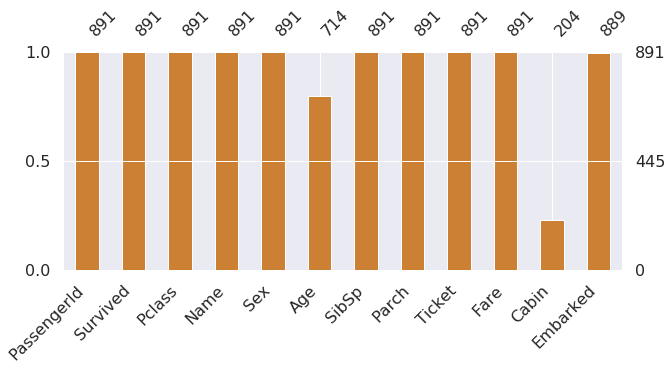

In [176]:
msno.bar(df=df_train.iloc[:, :], figsize=(10, 4), color=(0.8, 0.5, 0.2))

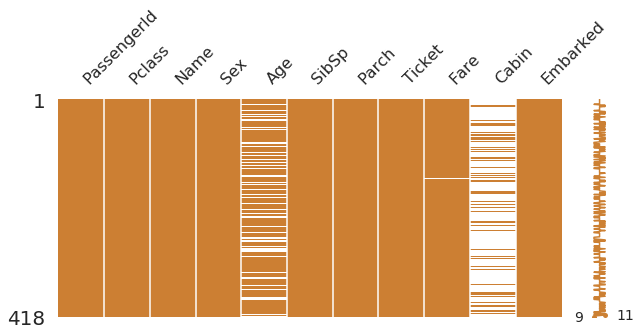

In [177]:
msno.matrix(df=df_test.iloc[:, :], figsize=(10, 4), color=(0.8, 0.5, 0.2))

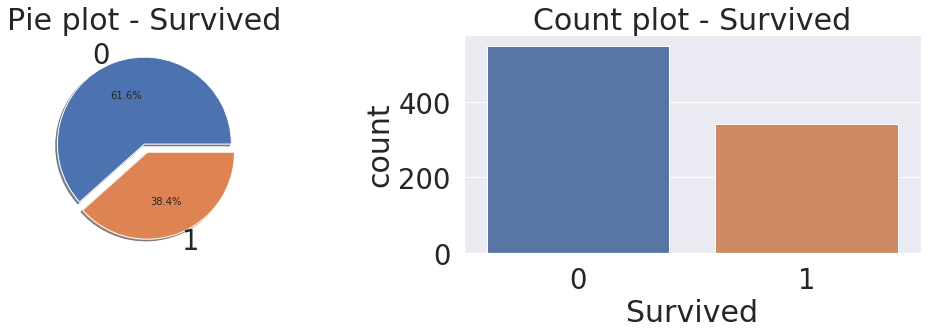

In [178]:
f, ax = plt.subplots(1, 2, figsize=(18, 4))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

Pclass

In [179]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [180]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [181]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


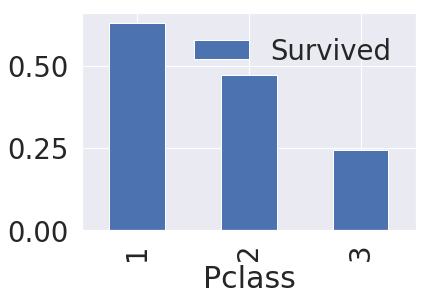

In [182]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

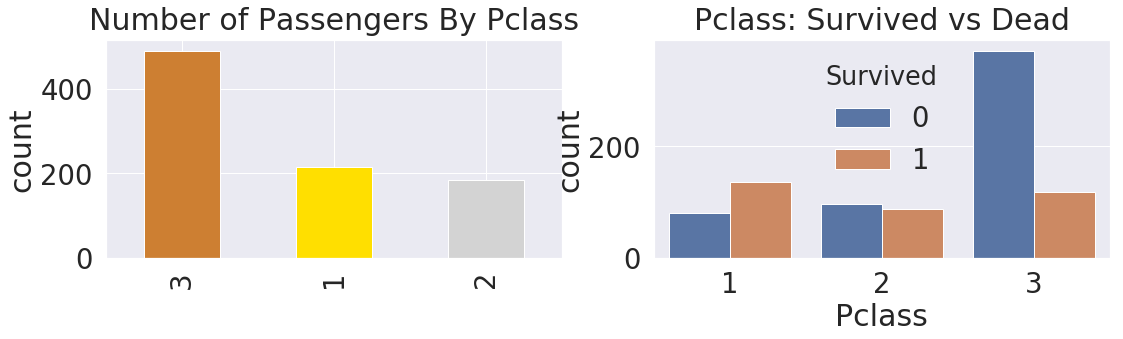

In [183]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 4))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

Sex

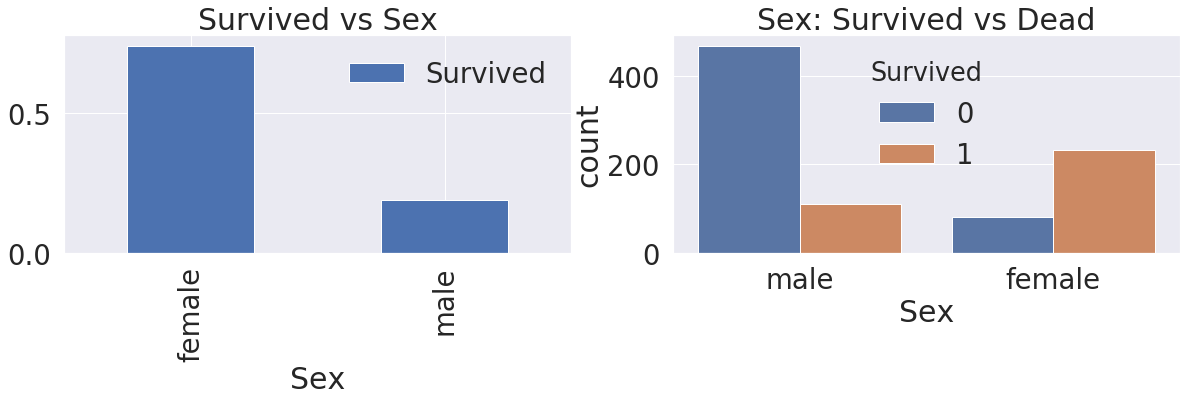

In [184]:
f, ax = plt.subplots(1, 2, figsize=(20,4))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [185]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [186]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891




Both Pclass and Sex

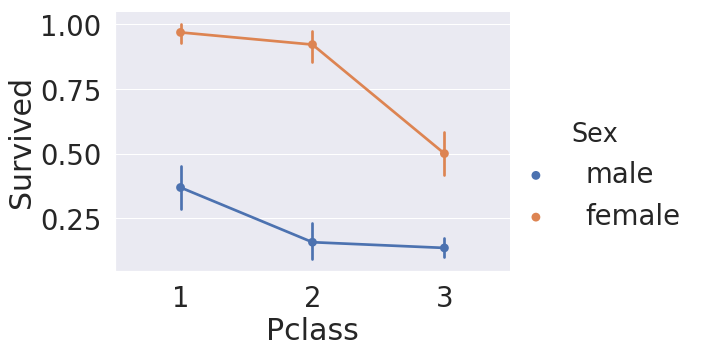

In [187]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=5, aspect=1.5)

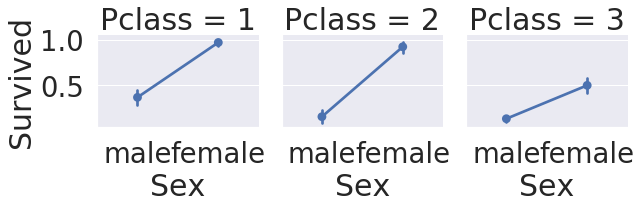

In [188]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5, size=3, aspect=1)

Age

In [189]:
print('max age : {:.1f} years'.format(df_train['Age'].max()))
print('min age : {:.1f} years'.format(df_train['Age'].min()))
print('average of age : {:.1f} years'.format(df_train['Age'].mean()))

max age : 80.0 years
min age : 0.4 years
average of age : 29.7 years


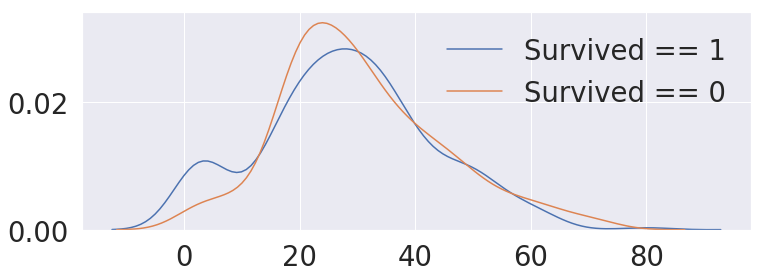

In [190]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

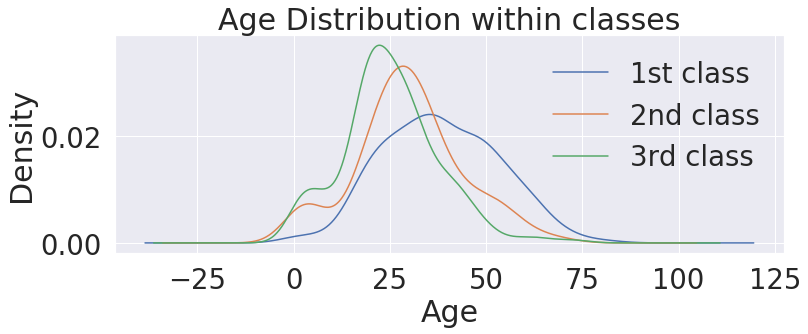

In [191]:
plt.figure(figsize=(12, 4))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

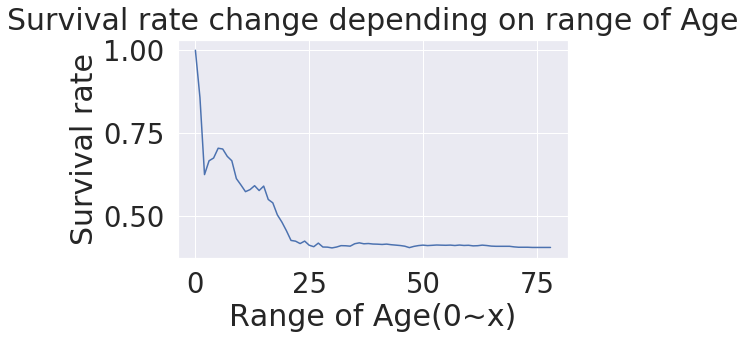

In [192]:
cummulate_survival_ratio = []
for i in range(1, 80):
  cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 4))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

Pclass, Sex, Age


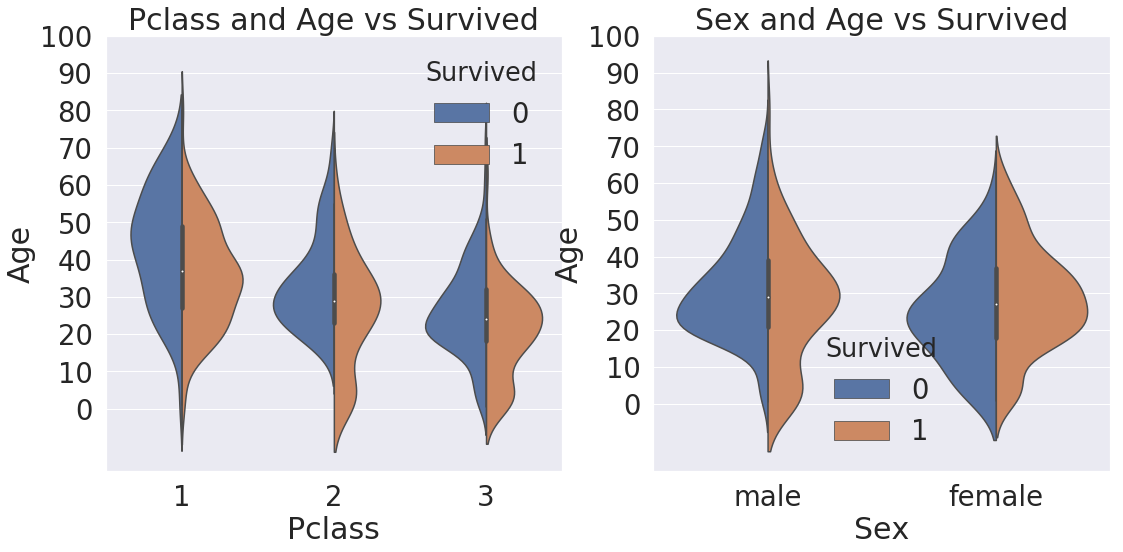

In [193]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, sclae='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, sclae='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

Embarked

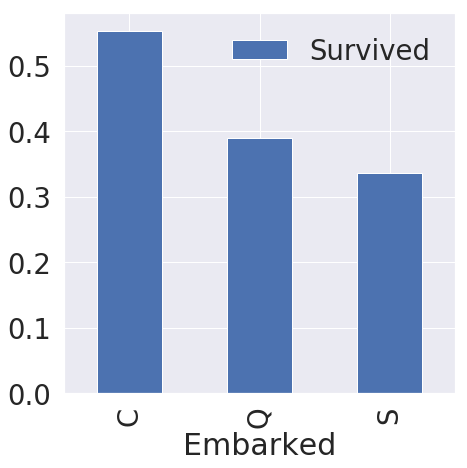

In [194]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().plot.bar(ax=ax)

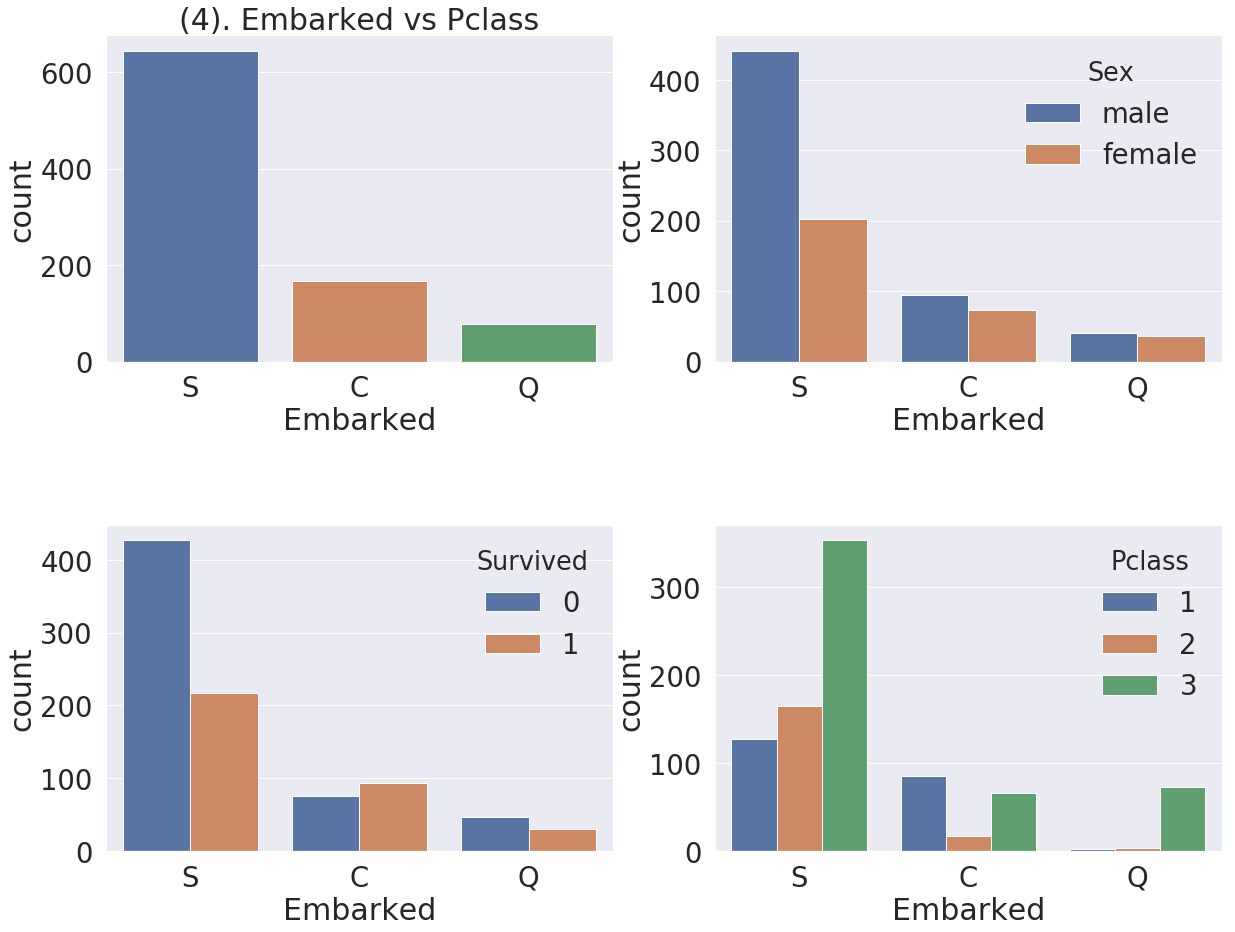

In [195]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[0, 0].set_title('(1). # of Passengers Boarded')
ax[0, 0].set_title('(2). Male-Females Split for Embarked')
ax[0, 0].set_title('(3). Embarked vs Survived')
ax[0, 0].set_title('(4). Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Family : SibSp + Parch

In [0]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [197]:
print("max size of family : ", df_train['FamilySize'].max())
print("min size of family : ", df_train['FamilySize'].min())

max size of family :  11
min size of family :  1


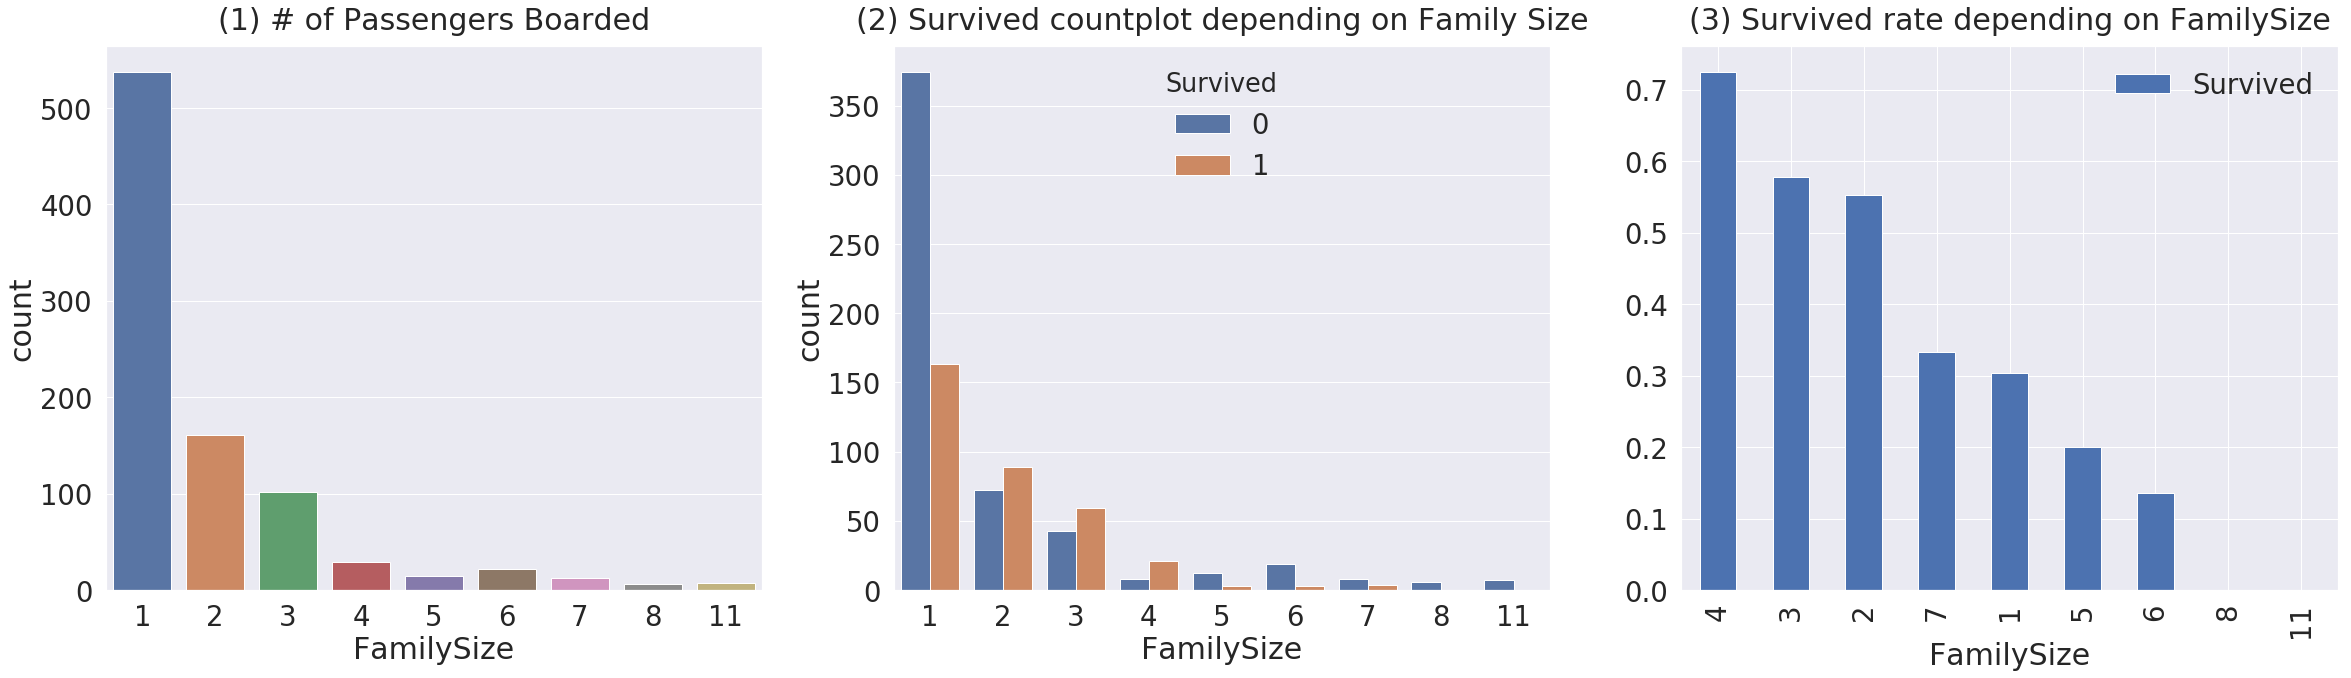

In [198]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[0].set_title('(1) # of Passengers Boarded', y=1.02)
ax[1].set_title('(2) Survived countplot depending on Family Size', y=1.02)
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Fare

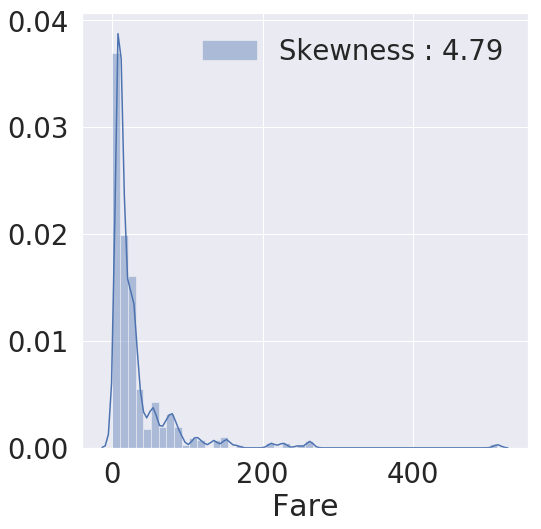

In [199]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
#g = sns.distplot(df_train['Fare'], color='b')
g = g.legend(loc='best')
# high skewness --> take log scale

In [0]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i> 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

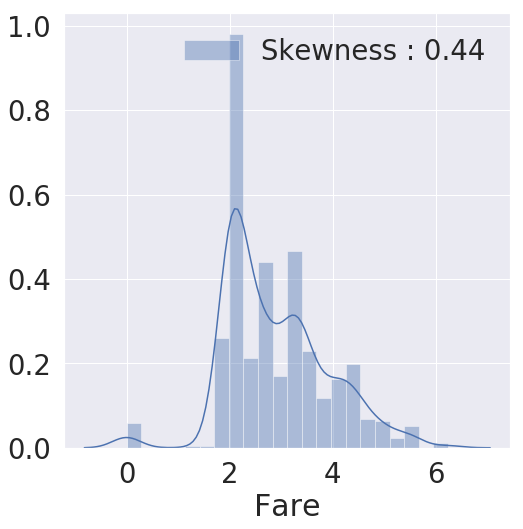

In [201]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [202]:
df_train['Ticket'].value_counts()

347082          7
1601            7
CA. 2343        7
347088          6
CA 2144         6
3101295         6
S.O.C. 14879    5
382652          5
PC 17757        4
349909          4
LINE            4
4133            4
2666            4
113781          4
347077          4
W./C. 6608      4
19950           4
113760          4
17421           4
C.A. 34651      3
371110          3
PC 17582        3
248727          3
239853          3
24160           3
230080          3
29106           3
PC 17760        3
PC 17572        3
110413          3
               ..
2641            1
248733          1
11769           1
335097          1
350050          1
2663            1
S.O.P. 1166     1
A/5. 10482      1
8471            1
349210          1
17464           1
350043          1
370376          1
350026          1
236852          1
27849           1
3101267         1
111428          1
PC 17473        1
111369          1
28425           1
349253          1
PC 17609        1
2700            1
248747    

In [203]:
df_train_ticket = df_train['Ticket']
df_train_ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
5                330877
6                 17463
7                349909
8                347742
9                237736
10              PP 9549
11               113783
12            A/5. 2151
13               347082
14               350406
15               248706
16               382652
17               244373
18               345763
19                 2649
20               239865
21               248698
22               330923
23               113788
24               349909
25               347077
26                 2631
27                19950
28               330959
29               349216
             ...       
861               28134
862               17466
863            CA. 2343
864              233866
865              236852
866       SC/PARIS 2149
867            PC 17590
868              345777
869              347742
870              349248
871             

In [204]:
df_train_ticket_encode = pd.get_dummies(df_train_ticket)
df_train_ticket_encode

,110152,110413,110465,110564,110813,111240,111320,111361,111369,111426,111427,111428,112050,112052,112053,112058,112059,112277,112379,113028,113043,113050,113051,113055,113056,113059,113501,113503,113505,113509,113510,113514,113572,113760,113767,113773,113776,113781,113783,113784,...,SOTON/O.Q. 3101310,SOTON/O.Q. 3101311,SOTON/O.Q. 3101312,SOTON/O.Q. 392078,SOTON/O.Q. 392087,SOTON/O2 3101272,SOTON/O2 3101287,SOTON/OQ 3101316,SOTON/OQ 3101317,SOTON/OQ 392076,SOTON/OQ 392082,SOTON/OQ 392086,SOTON/OQ 392089,SOTON/OQ 392090,STON/O 2. 3101269,STON/O 2. 3101273,STON/O 2. 3101274,STON/O 2. 3101275,STON/O 2. 3101280,STON/O 2. 3101285,STON/O 2. 3101286,STON/O 2. 3101288,STON/O 2. 3101289,STON/O 2. 3101292,STON/O 2. 3101293,STON/O 2. 3101294,STON/O2. 3101271,STON/O2. 3101279,STON/O2. 3101282,STON/O2. 3101283,STON/O2. 3101290,SW/PP 751,W./C. 14258,W./C. 14263,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Feature engineering

Fill Null 

In [0]:
# idea : title + statistics
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [206]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [207]:
target = ['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona']
new_label = ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr']
print(len(target))
print(len(new_label))

14
14


In [0]:
df_train['Initial'].replace(target, new_label, inplace=True)
df_test['Initial'].replace(target, new_label, inplace=True)

In [209]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


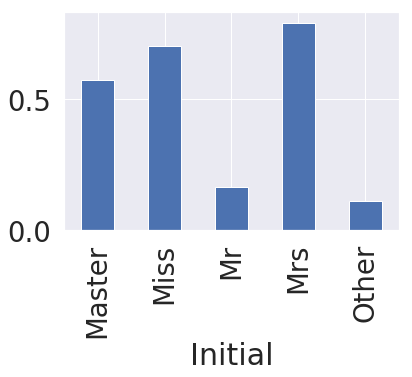

In [210]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [0]:
# Fill Null value of Age using average of Age
# Other method - https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling

df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'), 'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'), 'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'), 'Age'] = 46

In [212]:
# Fill Null value of Embarked
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


In [0]:
# Fill Null value of Embarked
df_train['Embarked'].fillna('S', inplace=True)

Change Age (continuous to categorical)

In [0]:
def category_age(x):
  if x < 10:
    return 0
  elif x < 20:
    return 1
  elif x < 30:
    return 2
  elif x < 40:
    return 3
  elif x < 50:
    return 4
  elif x < 60:
    return 5
  elif x < 70:
    return 6
  else:
    return 7

df_train['Age_cat'] = df_train['Age'].apply(category_age)

In [0]:
df_train['Age_cat_2'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat_2'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat_2'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat_2'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat_2'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat_2'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat_2'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat_2'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat_2'] = 7

df_test['Age_cat_2'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat_2'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat_2'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat_2'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat_2'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat_2'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat_2'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat_2'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat_2'] = 7

In [216]:
print('equallity of method of 1 (apply) and method of 2 is ', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

equallity of method of 1 (apply) and method of 2 is  True


In [0]:
df_train.drop(['Age', 'Age_cat'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)


In [218]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat_2
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,S,1,Mr,3


In [219]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat_2
0,892,3,"Kelly, Mr. James",male,0,0,330911,2.057860,NaN,Q,2,Mr,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,1.945910,NaN,S,2,Mrs,4
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,2.270836,NaN,Q,1,Mr,6
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,2.159003,NaN,S,2,Mr,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,2.508582,NaN,S,1,Mrs,2


Change Initial, Embarked and Sex (string to numerical)

In [0]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [221]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [222]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [224]:
df_train['Embarked'].isnull().any()

False

In [225]:
df_train['Embarked'].isnull().sum()

0

In [226]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat_2
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,2,1,2,3


In [0]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

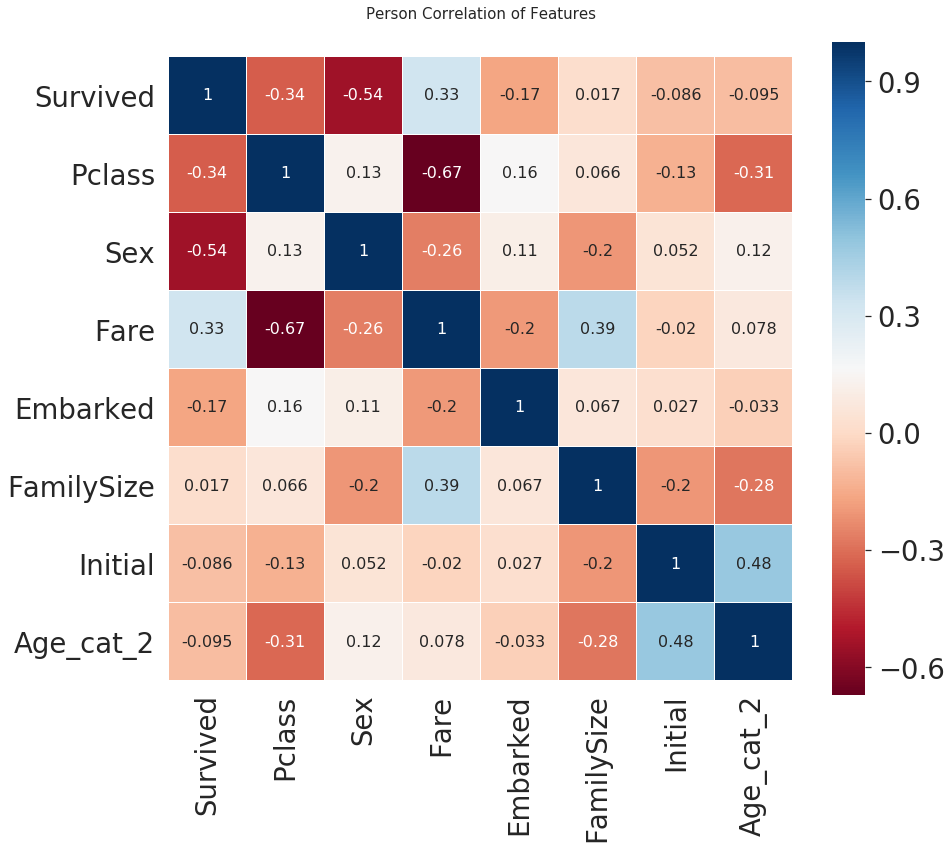

In [229]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat_2']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Person Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":16})
del heatmap_data

One-hot encoding on Initial and Embarked

In [0]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [231]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat_2,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [0]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [233]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat_2,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


Drop columns

In [0]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [236]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat_2,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [238]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat_2,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,2,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,2,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,1,2,0,0,0,1,0,0,0,1


Building machine learing model and prediction using the trained model - Binary Classification

In [0]:
# recommend - book - Introduction to machine larning with Python
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [0]:
# split test set and validation set
X_train = df_train.drop('Survived', axis=1).values
Y_train = df_train['Survived'].values
X_test = df_test.values

In [0]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

In [0]:
# model generation and prediction
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [246]:
print('# of validation set : {}, Acc : {:.2f}%'.format(y_vld.shape[0], 100*metrics.accuracy_score(prediction, y_vld)))

# of validation set : 268, Acc : 80.22%


In [0]:
# Feature importance
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

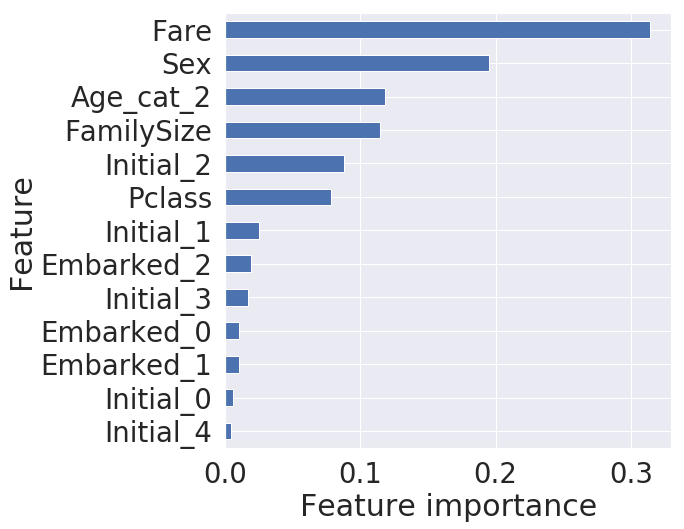

In [249]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [0]:
SUBMISSION_DATA_PATH = './drive/My Drive/Colab Notebooks/DataSets/Titanic/gender_submission.csv'
submission = pd.read_csv(SUBMISSION_DATA_PATH)

In [251]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [0]:
prediction = model.predict(X_test)
submission['pred_Survived'] = prediction

In [254]:
submission.head()

,PassengerId,Survived,pred_Survived
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,1,1


In [256]:
print('local model test > # of test set : {}, Acc : {:.2f}%'.format(submission.shape[0], 100*sum(submission['Survived']==submission['pred_Survived'])/submission.shape[0]))

local model test > # of test set : 418, Acc : 81.58%


In [0]:
submission.drop('pred_Survived', axis=1, inplace=True)

In [0]:
SUBMISSION_DATA_SAVE_PATH = './drive/My Drive/Colab Notebooks/DataSets/Titanic/my_first_submission.csv'
submission.to_csv(SUBMISSION_DATA_SAVE_PATH, index=False)